In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing
import graphviz

#### Importando a base e definindo as variáveis explicativas

In [2]:
df = pd.read_csv("celulas1.csv", sep=";", encoding="ISO-8859-1")

#### Trasformando variáveis categóricas em variáveis numéricas


In [3]:
colunas = [ 'nucleos', 'caudas', 'cor', 'membrana', ]
target = 'classe'
names = np.sort( df[target].unique())

#### Treinando a árvore de decisão

In [4]:
onehot = preprocessing.OneHotEncoder(sparse=False)
onehot.fit( df[['cor', 'membrana']] )

X_onehot = pd.DataFrame( onehot.transform( df[[ 'cor', 'membrana']]),
                columns=onehot.get_feature_names( [ 'cor', 'membrana']))

c:\Users\Win10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [5]:
X = pd.concat( [X_onehot, df[["nucleos", "caudas"]]], axis=1)

In [9]:
minha_arvore = tree.DecisionTreeClassifier(max_depth=2)
minha_arvore.fit( X = X, y=df[target])

DecisionTreeClassifier(max_depth=2)

In [10]:
X_ondehot = pd.DataFrame ( onehot.transform(df[['cor', 'membrana']]), columns=onehot.get_feature_names( ['cor', 'membrana']))

c:\Users\Win10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### Plotando a árvore de decisão

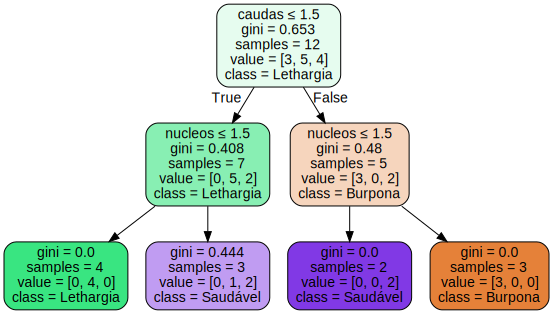

In [11]:
dot_data = tree.export_graphviz(minha_arvore, out_file=None, feature_names=X.columns, class_names=names, filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph